In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("all_players_stats.csv")

In [3]:
df

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6,0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7,1
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1,0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3,0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4,0
...,...,...,...,...,...,...,...,...,...,...
494,Southampton,5,Jack Stephens,Defender,14,2,0,0,3,0
495,Southampton,23,Nathan Tella,Midfielder,14,4,1,0,2,0
496,Southampton,43,Yann Valery,Defender,9,2,0,0,1,1
497,Southampton,32,Theo Walcott,Midfielder/Forward,6,6,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           499 non-null    object
 1   JerseyNo       499 non-null    int64 
 2   Player         499 non-null    object
 3   Position       499 non-null    object
 4   Apearances     499 non-null    int64 
 5   Substitutions  499 non-null    int64 
 6   Goals          499 non-null    int64 
 7   Penalties      499 non-null    int64 
 8   YellowCards    499 non-null    int64 
 9   RedCards       499 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 39.1+ KB


In [5]:
df.isnull().sum()

Team             0
JerseyNo         0
Player           0
Position         0
Apearances       0
Substitutions    0
Goals            0
Penalties        0
YellowCards      0
RedCards         0
dtype: int64

In [6]:
df.describe() 

,JerseyNo,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,22.787575,16.737475,4.663327,2.284569,0.174349,2.529058,0.080160
std,19.261750,13.877592,4.923397,4.043834,0.811355,2.734698,0.286208
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,16.000000,3.000000,1.000000,0.000000,2.000000,0.000000
75%,30.000000,27.000000,7.000000,3.000000,0.000000,4.000000,0.000000
max,97.000000,54.000000,25.000000,31.000000,9.000000,12.000000,2.000000


In [8]:
df['Team'].unique() # melihat data unik pada kolom status id

array(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton and Hove Albion',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Norwich City',
       'Southampton'], dtype=object)

In [9]:
len(df['Team'].unique())

16

In [38]:
df['Position'].unique()

array([2, 0, 5, 6, 4, 7, 3, 1], dtype=int64)

In [39]:
len(df['Position'].unique()) #untuk menghitung jumlah nilai unik (unik) dalam kolom 'status_published' 

8

In [40]:
df['JerseyNo'].unique()

array([ 7,  6, 32,  4,  8, 34, 35,  5, 10,  3,  9, 17, 18, 20, 23, 16, 14,
       30, 25,  1, 19, 15, 21, 31, 22, 26, 87, 24,  2, 46, 33, 39, 27, 47,
       49, 40, 41, 12, 11, 29, 28, 36, 43, 58, 13, 42, 59, 57, 60, 53, 55,
       75, 54, 64, 68, 45, 44, 61, 62, 50, 37, 38, 77, 66, 63, 86, 84, 67,
       94, 89, 80, 76, 82, 48, 56, 96, 90, 79, 97, 73, 72], dtype=int64)

In [41]:
len(df['JerseyNo'].unique())

81

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   JerseyNo       499 non-null    int64
 1   Position       499 non-null    int64
 2   Apearances     499 non-null    int64
 3   Substitutions  499 non-null    int64
 4   Goals          499 non-null    int64
 5   Penalties      499 non-null    int64
 6   YellowCards    499 non-null    int64
 7   RedCards       499 non-null    int64
dtypes: int64(8)
memory usage: 31.3 KB


In [43]:
df.head()

,JerseyNo,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,7,2,40,3,12,2,6,0
1,6,0,37,1,5,0,7,1
2,32,5,37,0,0,0,1,0
3,4,0,37,0,0,0,3,0
4,8,6,36,4,7,0,4,0


In [52]:
X = df #menentukan label x dan y

y = df['JerseyNo']

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  #untuk mengubah variabel kategorikal menjadi nilai numerik.

X['JerseyNo'] = le.fit_transform(X['JerseyNo'])

y = le.transform(y)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   JerseyNo       499 non-null    int64
 1   Position       499 non-null    int64
 2   Apearances     499 non-null    int64
 3   Substitutions  499 non-null    int64
 4   Goals          499 non-null    int64
 5   Penalties      499 non-null    int64
 6   YellowCards    499 non-null    int64
 7   RedCards       499 non-null    int64
dtypes: int64(8)
memory usage: 31.3 KB


In [56]:
X.head()

,JerseyNo,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,6,2,40,3,12,2,6,0
1,5,0,37,1,5,0,7,1
2,31,5,37,0,0,0,1,0
3,3,0,37,0,0,0,3,0
4,7,6,36,4,7,0,4,0


In [57]:
cols = X.columns

In [58]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler() #untuk melakukan penskalaan fitur pada data. Ini dapat bermanfaat untuk memastikan bahwa semua fitur memiliki rentang nilai yang serupa

X = ms.fit_transform(X)

In [59]:
X = pd.DataFrame(X, columns=[cols])

In [61]:
X.head()

,JerseyNo,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,0.0750,0.285714,0.740741,0.12,0.387097,0.222222,0.500000,0.0
1,0.0625,0.000000,0.685185,0.04,0.161290,0.000000,0.583333,0.5
2,0.3875,0.714286,0.685185,0.00,0.000000,0.000000,0.083333,0.0
3,0.0375,0.000000,0.685185,0.00,0.000000,0.000000,0.250000,0.0
4,0.0875,0.857143,0.666667,0.16,0.225806,0.000000,0.333333,0.0


In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) #memanggil algoritma k-means untuk melakukan clustering pada data.

kmeans.fit(X)

C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [63]:
kmeans.cluster_centers_

array([[0.28026316, 0.80263158, 0.28782895, 0.22973684, 0.09836587,
        0.02997076, 0.17872807, 0.02302632],
       [0.24371795, 0.11282051, 0.34444444, 0.11917949, 0.03523573,
        0.002849  , 0.26068376, 0.06666667]])

In [64]:
kmeans.inertia_

132.65036031558736

In [65]:
labels = kmeans.labels_

# Periksa berapa banyak sampel yang telah diberi label dengan benar.
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 29 out of 499 samples were correctly labeled.


In [66]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size))) #mencetak nilai akurasi

Accuracy score: 0.06


C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

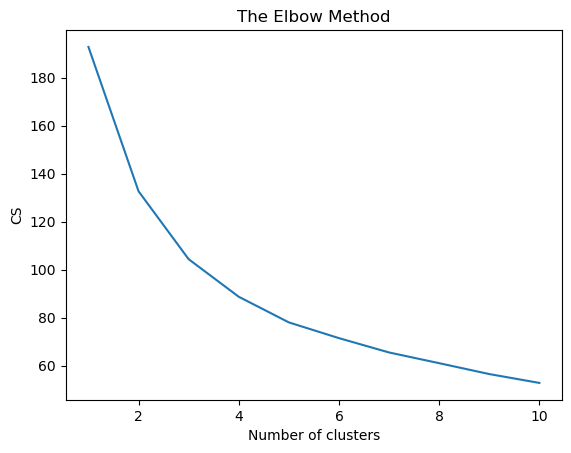

In [67]:
from sklearn.cluster import KMeans #untuk menentukan jumlah cluster yang optimal dalam model K-Means.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# Periksa berapa banyak sampel yang telah diberi label dengan benar.

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Result: 29 out of 499 samples were correctly labeled.
Accuracy score: 0.06


In [69]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# Periksa berapa banyak sampel yang telah diberi label dengan benar.
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Result: 17 out of 499 samples were correctly labeled.
Accuracy score: 0.03


In [70]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# Periksa berapa banyak sampel yang telah diberi label dengan benar.
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\farha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Result: 13 out of 499 samples were correctly labeled.
Accuracy score: 0.03
